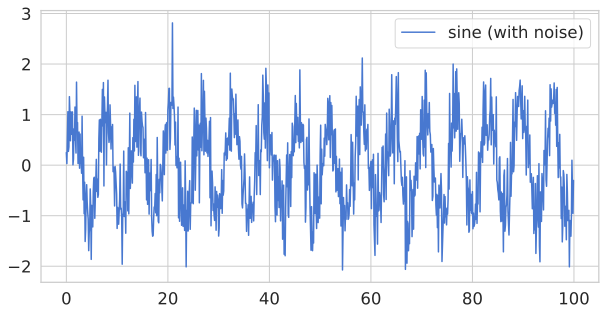

In [27]:
import numpy as np

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow import keras


%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# Increase the default plot size
rcParams['figure.figsize'] = 10, 5



RANDOM_SEED = 42
pd.options.display.max_columns = 5


np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))
plt.plot(time, sin, label='sine (with noise)');
plt.legend()

In [28]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [29]:
length = len(df)
train_size = int(length * 0.8)
test_size = length - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:length]
print(len(train), len(test))

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

800 200


In [30]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train[0][0][0])

(790, 10, 1) (790,)
(190, 10, 1) (190,)
0.24835707650561634


In [31]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='MSE', optimizer=keras.optimizers.Adam(0.001))

In [32]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 2s 3ms/sample - loss: 0.4394 - val_loss: 0.3740
Epoch 2/30
711/711 [==============================] - 1s 930us/sample - loss: 0.3324 - val_loss: 0.3310
Epoch 3/30
711/711 [==============================] - 1s 965us/sample - loss: 0.3219 - val_loss: 0.3254
Epoch 4/30
711/711 [==============================] - 1s 958us/sample - loss: 0.3199 - val_loss: 0.3217
Epoch 5/30
711/711 [==============================] - 1s 967us/sample - loss: 0.3184 - val_loss: 0.3191
Epoch 6/30
711/711 [==============================] - 1s 901us/sample - loss: 0.3173 - val_loss: 0.3171
Epoch 7/30
711/711 [==============================] - 1s 940us/sample - loss: 0.3165 - val_loss: 0.3154
Epoch 8/30
711/711 [==============================] - 1s 935us/sample - loss: 0.3157 - val_loss: 0.3140
Epoch 9/30
711/711 [==============================] - 1s 942us/sample - loss: 0.3150 - val_loss: 0.3126
Epoch 10/30
711/711 [

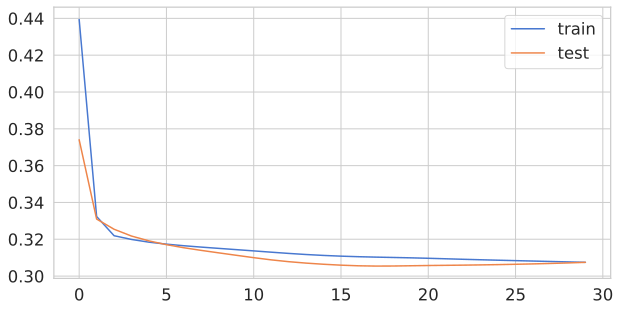

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

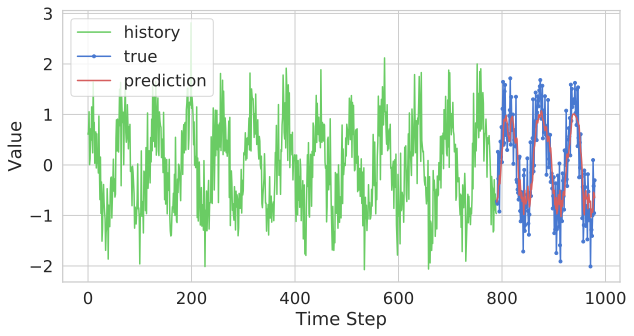

In [34]:
y_pred = model.predict(X_test)
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()